# Daniil Khodosko

## Research question/interests

What is the most over valued stock? Which US stock are people paying more for then necessary? Which stock is trading above its actual value?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables


Loading in stocks of my choice for EDA:

In [2]:
AAPL_df = pd.read_csv("../data/raw/archive/Stocks/aapl.us.txt", sep=",", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
MSFT_df = pd.read_csv("../data/raw/archive/Stocks/msft.us.txt", sep=",", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
BA_df = pd.read_csv("../data/raw/archive/Stocks/ba.us.txt", sep=",", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
LMT_df = pd.read_csv("../data/raw/archive/Stocks/lmt.us.txt", sep=",", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])
TSLA_df = pd.read_csv("../data/raw/archive/Stocks/tsla.us.txt", sep=",", header=None, names=["Date", "Open", "High", "Low", "Close", "Volume", "OpenInt"])




In [3]:
AAPL_df

,Date,Open,High,Low,Close,Volume,OpenInt
0,Date,Open,High,Low,Close,Volume,OpenInt
1,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
2,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
3,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
4,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
...,...,...,...,...,...,...,...
8360,2017-11-06,171.75,174.36,171.1,173.63,34901241,0
8361,2017-11-07,173.29,174.51,173.29,174.18,24424877,0
8362,2017-11-08,174.03,175.61,173.71,175.61,24451166,0
8363,2017-11-09,174.48,175.46,172.52,175.25,29533086,0


# TASK 1: **EDA**

Here we will explore my stock data, I will not just be exploring a single stock but I will also comnbine stock dataframes to compare them to each other to see which is more overpriced.
First let's look at the structure of the data. 

In [4]:
print(f"Apple shape: {AAPL_df.shape}")
print(f"BA shape: {BA_df.shape}")
print(f"MSFT shape: {MSFT_df.shape}")
print(f"LMT shape: {LMT_df.shape}")

Apple shape: (8365, 7)
BA shape: (12075, 7)
MSFT shape: (7984, 7)
LMT shape: (10305, 7)


Looking at this some stocks have more rows. This is because some stocks have been around for longer or whoever put this dataset together collected more data for certain stocks. 

In [5]:
print(f"AAPL_df head: {AAPL_df.head()}")
print(f"MSFT_df head: {MSFT_df.head()}")
print(f"LMT_df head: {LMT_df.head()}")



AAPL_df head:          Date     Open     High      Low    Close    Volume  OpenInt
0        Date     Open     High      Low    Close    Volume  OpenInt
1  1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0
2  1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0
3  1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0
4  1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0
MSFT_df head:          Date     Open     High      Low    Close      Volume  OpenInt
0        Date     Open     High      Low    Close      Volume  OpenInt
1  1986-03-13   0.0672  0.07533   0.0672  0.07533  1371330506        0
2  1986-03-14  0.07533  0.07533  0.07533  0.07533   409569463        0
3  1986-03-17  0.07533  0.07533  0.07533  0.07533   176995245        0
4  1986-03-18  0.07533  0.07533  0.07533  0.07533    90067008        0
LMT_df head:          Date    Open    High     Low   Close  Volume  OpenInt
0        Date    Open    High     Low   Close  Volume  O

We can also discard the OpenInt column because it seems to have garbage data. 

In [12]:
AAPL_df['Open'] = pd.to_numeric(AAPL_df['Open'], errors='coerce')
AAPL_df['High'] = pd.to_numeric(AAPL_df['High'], errors='coerce')
AAPL_df['Low'] = pd.to_numeric(AAPL_df['Low'], errors='coerce')
AAPL_df['Close'] = pd.to_numeric(AAPL_df['Close'], errors='coerce')
AAPL_df['Volume'] = pd.to_numeric(AAPL_df['Volume'], errors='coerce')

print(AAPL_df.dtypes)

Date        object
Open       float64
High       float64
Low        float64
Close      float64
Volume     float64
OpenInt     object
dtype: object


In [13]:
AAPL_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Open,High,Low,Close,Volume
count,8364.000000,8364.000000,8364.000000,8364.000000,8364.000000
mean,22.284350,22.495867,22.054244,22.281018,106641628.386059
std,37.763402,38.057733,37.447432,37.764469,99351865.219193
min,0.233050,0.235640,0.230510,0.230510,0.000000
25%,1.137100,1.164200,1.112800,1.137100,43843646.500000
50%,1.632800,1.663400,1.600600,1.628250,74813834.000000
75%,23.739000,23.930500,23.335750,23.694500,132053352.500000
max,175.110000,175.610000,174.270000,175.610000,2069769775.000000


Minimum Volume of 0 also does not seem right.

In [21]:
AAPL_df.head()


,Date,Open,High,Low,Close,Volume
0,Date,NaN,NaN,NaN,NaN,NaN
1,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030.0
2,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532.0
3,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199.0
4,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801.0


<AxesSubplot:>

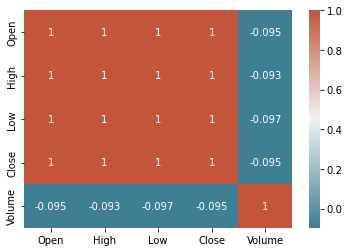

In [22]:
corr = AAPL_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:>

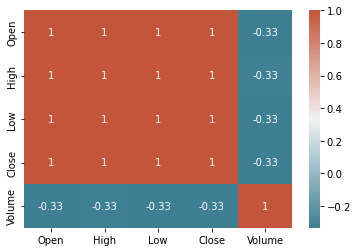

In [24]:

MSFT_df['Open'] = pd.to_numeric(MSFT_df['Open'], errors='coerce')
MSFT_df['High'] = pd.to_numeric(MSFT_df['High'], errors='coerce')
MSFT_df['Low'] = pd.to_numeric(MSFT_df['Low'], errors='coerce')
MSFT_df['Close'] = pd.to_numeric(MSFT_df['Close'], errors='coerce')
MSFT_df['Volume'] = pd.to_numeric(MSFT_df['Volume'], errors='coerce')
corr = MSFT_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

If you look at the heatmap and the data itself you will see that a stocks open, close, and high price are all almost the same. 
The reason for this is because the stocks which I have chosen to display are what is called "blue chip" stocks, and they have a very low price volitility, meaning that throughout the day the price does not change much. 

<AxesSubplot:xlabel='Date', ylabel='High'>

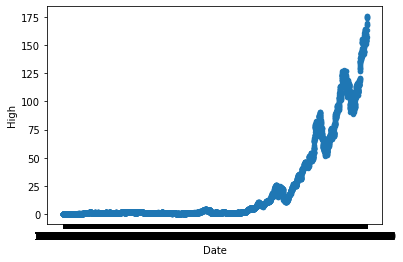

In [28]:
AAPL_df.plot(kind='scatter', x='Date', y='High')


<AxesSubplot:>

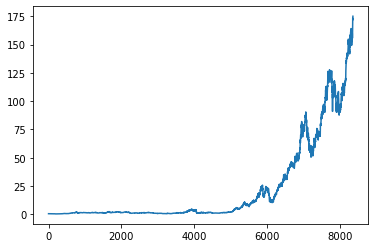

In [30]:
AAPL_df['Open'].plot()


In [35]:
AAPL_df['Close'].loc['2014-01-01':'2015-01-01'].ta_plot(study='boll')

AttributeError: 'Series' object has no attribute 'ta_plot'